Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

# Машинное обучение в бизнесе

## Урок 1. Data-driven-подход на примере задачи маршрутизации заявок в helpdesk

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [109]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [110]:
#Ваш код здесь
male_female = df.loc[df['gender'] == 'Male', 'gender'].count()/df.loc[df['gender'] == 'Female', 'gender'].count()
print(f'Отношение мужчин и женщин в представленном наборе данных = {round(male_female,2)}')

Отношение мужчин и женщин в представленном наборе данных = 1.02


In [111]:
# другой способ
frac = (df['gender'] == 'Male').sum()/(df['gender'] == 'Female').sum()
print(f'Отношение мужчин и женщин в представленном наборе данных = {round(frac, 2)}')


Отношение мужчин и женщин в представленном наборе данных = 1.02


##### 2. Какое количество уникальных значений у поля InternetService?

In [112]:
#Ваш код здесь
len(df['InternetService'].unique())

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [113]:
#Ваш код здесь
df['TotalCharges'].median()



TypeError: 

In [114]:
# проверка - какие значения не могут быть сконвертированы в числовое значение. 
print (df.loc[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull(), 'TotalCharges'])

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [115]:
df.loc[df['TotalCharges'] == ' ', 'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [117]:
df['TotalCharges'].isnull().sum()


0

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

__Ответ:__ При попытке вывести статистики по полю 'TotalCharges' получаем ошибку, так как поле имеет тип  'object', а неявное преобразование в тип float не срабатывает, так как в признаке, в некоторых строчках вместо числа стоит пробел.

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [118]:
#Ваш код здесь
ps2num = {'Yes': 1, 'No': 0}
df['PhoneService'] = df['PhoneService'].replace(ps2num)
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [119]:
#Ваш код здесь
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df['TotalCharges'].isna().sum()

11

In [120]:
# замена пробелов на NaN уже позволяет работать неявным преобразованиям
df['TotalCharges'].median()

1397.475

In [121]:
# изменение типа данных для поля 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['TotalCharges'].dtypes

dtype('float64')

In [122]:
# замена значений NaN нулями в текущем датасете
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'].isna().sum()

0

In [123]:
# результат отличается от результата, посчитанного со значениями NaN 
df['TotalCharges'].median()

1394.55

In [124]:
df['TotalCharges'].mean()

2279.734303563826

In [125]:
df['TotalCharges'].std()

2266.7944696890195

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [126]:
#Ваш код здесь
yes_no2num = {'Yes':1, 'No':0}

df['Churn'] = df['Churn'].replace(yes_no2num)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [158]:
#Ваш код здесь
f2num = {'Yes':1, 'No':0, 'No internet service':0}

df[['StreamingMovies','StreamingTV', 'TechSupport']] = df[['StreamingMovies','StreamingTV', 'TechSupport']].replace(f2num)
df[['StreamingMovies','StreamingTV', 'TechSupport']]

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
7038,1,1,1
7039,1,1,0
7040,0,0,0
7041,0,0,0


##### 8. Заполните пропуски в поле PhoneService значением 0

In [132]:
#Ваш код здесь
df[['PhoneService']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PhoneService  7043 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


в поле PhoneService нет пропусков

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [133]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь

my_df = df[columns]
my_df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,No,0,0
1,Male,34,1,1889.50,0,No,0,0
2,Male,2,1,108.15,0,No,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [161]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X = df[features]
y = df[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4718, 7), (2325, 7), (4718,), (2325,))

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [162]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [163]:
#Ваш код здесь
ft_Xy = gender.fit_transform(X_train, y_train)

In [164]:
ft_Xy

,gender_Female,gender_Male
6790,1,0
4156,0,1
710,0,1
1335,0,1
1661,1,0
...,...,...
6512,0,1
48,0,1
772,1,0
5944,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

Ответ: Это полезно когда признаки в одном наборе данных сильно различаются по масштабу. Если все признаки привести к одному масштабу проще и быстрее работают такие алгоритмы как градиентный спуск, а для таких как KNN , масштабирование вообще обязательно. 

In [165]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

In [166]:
tenure

Pipeline(steps=[('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [168]:
#Ваш код здесь
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [169]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [170]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

In [171]:
feature_processing

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
             

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [172]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [174]:
#Ваш код здесь
pred = pipeline.predict(X_valid)

In [175]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [176]:
pred_prob = pipeline.predict_proba(X_valid)

In [177]:
pred_prob

array([[0.08, 0.92],
       [1.  , 0.  ],
       [0.88, 0.12],
       ...,
       [0.92, 0.08],
       [0.98, 0.02],
       [0.85, 0.15]])

In [181]:
pred_proba = pred_prob[:, 1]
pred_proba

array([0.92, 0.  , 0.12, ..., 0.08, 0.02, 0.15])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [184]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
ras = roc_auc_score(y_valid, pred_proba)
print(f'ROC AUC score = {round(ras, 2)}')

ll = log_loss(y_valid, pred_proba)
print(f'Log Loss  = {round(ll, 2)}')

ROC AUC score = 0.76
LOG Loss  = 0.93


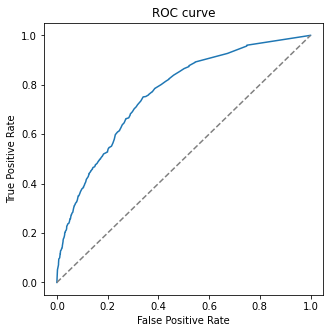

In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, pred_proba, pos_label=1)

plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

### Сохраним наш пайплайн

In [190]:
#pip install dill

     |████████████████████████████████| 86 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [191]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)